Purpose of this code is for getting a statistical analysis of Pokemon Type breakdowns, in order to get some statistical analysis of a specific pokemon, in evaluating a pokemon team.  

First analysis is to be done on type. One pokemon move may be either super effective (double damage), normally effective (regular damage), not very effective (half damage), or have no effect at all on another pokemon, based on type.
The type of the move, as well as the type(s) of the deffending pokemon go into accounting for this. The goal will then be to identify the best offensive and defensive typings. We'll do this first by simply taking into account the pokemon, and then by taking into account the relative frequency of types to come up in the pokedex (note that a better estimation would be the relative frequence of usage of pokemon in competetive play, but those statistics are harder to come by).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io

In [ ]:
data_to_load = files.upload()
df = pd.read_csv(io.BytesIO(data_to_load['pokedex.csv']))
print(df)

Saving pokedex.csv to pokedex (2).csv
     national_number   gen english_name primary_type secondary_type  \
0                  1     I    Bulbasaur        grass         poison   
1                  2     I      Ivysaur        grass         poison   
2                  3     I     Venusaur        grass         poison   
3                  4     I   Charmander         fire            NaN   
4                  5     I   Charmeleon         fire            NaN   
..               ...   ...          ...          ...            ...   
893              894  VIII    Regieleki     electric            NaN   
894              895  VIII    Regidrago       dragon            NaN   
895              896  VIII    Glastrier          ice            NaN   
896              897  VIII    Spectrier        ghost            NaN   
897              898  VIII      Calyrex      psychic          grass   

          classification percent_male percent_female   hp  attack  ...  \
0           Seed Pokémon        88.

In [ ]:
type_df = df
for col in type_df.columns:
  if col != "english_name" and col!= "national_number" and col!= "primary_type" and col!= "secondary_type":
    del type_df[col]
    #print(f"Deleteing:", col)
print("Remaining:")
print(type_df)

types = []  #This will act as an index.
n = len(type_df["english_name"])
for i in range(n):
  temp1 = type_df["primary_type"][i]
  temp2 = type_df["secondary_type"][i]
  if (temp1 not in types) == True:
    types.append(temp1)

types = ["normal", "fire", "water", "grass", "electric", "ice", "fighting", "poison", "ground", "flying", "psychic", "bug", "rock", "ghost", "dragon", "dark", "steel", "fairy"]

print(types)
#print(len(types))

type_frequency = np.zeros((18, 3))
for i in range(18):
  type_frequency[i, 0] = i

for i in range(n):
  temp1 = type_df["primary_type"][i]
  temp2 = type_df["secondary_type"][i]
  for k in types:
    if temp1 == k:
      for l in range(18):
        if types[l] == k:
          type_frequency[l, 1] += 1
    if temp2 == k:
      for l in range(18):
        if types[l] == k:
          type_frequency[l, 1] += 1

total = 898

relative_frequency = []
for i in range(18):
  type_frequency[i, 2] = np.round(type_frequency[i, 1]/total, decimals = 3)
  relative_frequency.append(type_frequency[i, 2])


print(type_frequency)
print(relative_frequency)

Remaining:
     national_number english_name primary_type secondary_type
0                  1    Bulbasaur        grass         poison
1                  2      Ivysaur        grass         poison
2                  3     Venusaur        grass         poison
3                  4   Charmander         fire            NaN
4                  5   Charmeleon         fire            NaN
..               ...          ...          ...            ...
893              894    Regieleki     electric            NaN
894              895    Regidrago       dragon            NaN
895              896    Glastrier          ice            NaN
896              897    Spectrier        ghost            NaN
897              898      Calyrex      psychic          grass

[898 rows x 4 columns]
['normal', 'fire', 'water', 'grass', 'electric', 'ice', 'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock', 'ghost', 'dragon', 'dark', 'steel', 'fairy']
[[0.00e+00 1.15e+02 1.28e-01]
 [1.00e+00 7.40e+01 8.

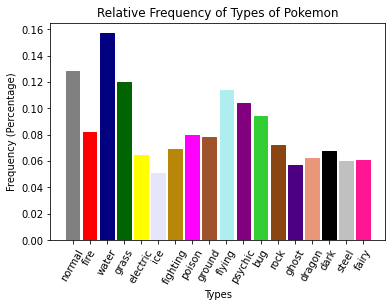

In [ ]:
#colors = ["", "", "", "", "", "", "", "", "deeppink", "", "", "", "", "", "", "black", "silver", ""]
colors = ["grey", "red", "navy", "darkgreen", "yellow", "lavender", "darkgoldenrod", "fuchsia", "sienna", "paleturquoise", "purple", "limegreen", "saddlebrown", "indigo", "darksalmon", "black", "silver", "deeppink"]
barlist = plt.bar(types, relative_frequency, color='maroon')
for i in range(18):
  barlist[i].set_color(colors[i])
plt.xlabel("Types")
plt.xticks(rotation=60)
plt.ylabel("Frequency (Percentage)")
plt.title("Relative Frequency of Types of Pokemon")
plt.show()

Now we have some relative frequencies, some core assumptions will be made which should not be made.  
First, we'll assume that the number of times an attack move is used is directly proportional to the number of pokemon of that type. This will be used in ranking deffensive type moves. This shouldn't be used, but for lack of a better relative measurement, its the assumption that'll be made.
Second, we'll assume that the number of times you'll go up against a pokemon of a certain type is relative to the number of pokemon of that type. Again, this isn't true, but (until I have a relative frequency of actual pokemon usage), it'll be the best measurement we have.  
Eventually, I'll get a measurement of pokemon based off smogon tier rating, which is a better approximation of usage. This will help with classifying offensive types.

In [ ]:
type_matrix = np.ones((18, 18))


"""
for the type matrix, the index is:
  0 = normal
  1 = fire
  2 = water
  3 = grass
  4 = electric
  5 = ice
  6 = fighting
  7 = poison
  8 = ground
  9 = flying
  10 = psychic
  11 = bug
  12 = rock
  13 = ghost
  14 = dragon
  15 = dark
  16 = steel
  17 = fairy
"""

type_matrix[0, 12] = 1/2
type_matrix[0, 13] = 0
type_matrix[0, 16] = 1/2

type_matrix[1, 1] = 1/2
type_matrix[1, 2] = 1/2
type_matrix[1, 3] = 2
type_matrix[1, 5] = 2
type_matrix[1, 11] = 2
type_matrix[1, 12] = 1/2
type_matrix[1, 14] = 1/2
type_matrix[1, 16] = 2

type_matrix[2, 1] = 2
type_matrix[2, 2] = 1/2
type_matrix[2, 3] = 1/2
type_matrix[2, 8] = 2
type_matrix[2, 12] = 2
type_matrix[2, 14] = 1/2

type_matrix[3, 1] = 1/2
type_matrix[3, 2] = 2
type_matrix[3, 3] = 1/2
type_matrix[3, 7] = 1/2
type_matrix[3, 8] = 2
type_matrix[3, 9] = 1/2
type_matrix[3, 11] = 1/2
type_matrix[3, 12] = 2
type_matrix[3, 14] = 1/2
type_matrix[3, 16] = 1/2

type_matrix[4, 2] = 2
type_matrix[4, 3] = 1/2
type_matrix[4, 4] = 1/2
type_matrix[4, 8] = 0
type_matrix[4, 9] = 2
type_matrix[4, 14] = 1/2

type_matrix[5, 1] = 1/2
type_matrix[5, 2] = 1/2
type_matrix[5, 3] = 2
type_matrix[5, 5] = 1/2
type_matrix[5, 8] = 2
type_matrix[5, 9] = 2
type_matrix[5, 14] = 2
type_matrix[5, 16] = 1/2

type_matrix[6, 0] = 2
type_matrix[6, 5] = 2
type_matrix[6, 7] = 1/2
type_matrix[6, 9] = 1/2
type_matrix[6, 10] = 1/2
type_matrix[6, 11] = 1/2
type_matrix[6, 12] = 2
type_matrix[6, 13] = 0
type_matrix[6, 15] = 2
type_matrix[6, 16] = 2
type_matrix[6, 17] = 1/2

type_matrix[7, 3] = 2
type_matrix[7, 7] = 1/2
type_matrix[7, 8] = 1/2
type_matrix[7, 12] = 1/2
type_matrix[7, 13] = 1/2
type_matrix[7, 16] = 0
type_matrix[7, 17] = 2

type_matrix[8, 1] = 2
type_matrix[8, 3] = 1/2
type_matrix[8, 4] = 2
type_matrix[8, 7] = 2
type_matrix[8, 9] = 0
type_matrix[8, 11] = 1/2
type_matrix[8, 12] = 2
type_matrix[8, 16] = 2

type_matrix[9, 3] = 2
type_matrix[9, 4] = 1/2
type_matrix[9, 6] = 2
type_matrix[9, 11] = 2
type_matrix[9, 12] = 1/2
type_matrix[9, 16] = 1/2

type_matrix[10, 6] = 2
type_matrix[10, 7] = 2
type_matrix[10, 10] = 1/2
type_matrix[10, 15] = 0
type_matrix[10, 16] = 1/2

type_matrix[11, 1] = 1/2
type_matrix[11, 3] = 2
type_matrix[11, 6] = 1/2
type_matrix[11, 7] = 1/2
type_matrix[11, 9] = 1/2
type_matrix[11, 10] = 2
type_matrix[11, 13] = 1/2
type_matrix[11, 15] = 2
type_matrix[11, 16] = 1/2
type_matrix[11, 17] = 1/2

type_matrix[12, 1] = 2
type_matrix[12, 5] = 2
type_matrix[12, 6] = 1/2
type_matrix[12, 8] = 1/2
type_matrix[12, 9] = 2
type_matrix[12, 11] = 2
type_matrix[12, 16] = 1/2

type_matrix[13, 0] = 0
type_matrix[13, 10] = 2
type_matrix[13, 13] = 2
type_matrix[13, 15] = 1/2

type_matrix[14, 14] = 2
type_matrix[14, 16] = 1/2
type_matrix[14, 17] = 0

type_matrix[15, 6] = 1/2
type_matrix[15, 10] = 2
type_matrix[15, 13] = 2
type_matrix[15, 15] = 1/2
type_matrix[15, 17] = 1/2

type_matrix[16, 1] = 1/2
type_matrix[16, 2] = 1/2
type_matrix[16, 4] = 1/2
type_matrix[16, 5] = 2
type_matrix[16, 12] = 2
type_matrix[16, 16] = 1/2
type_matrix[16, 17] = 2

type_matrix[17, 1] = 1/2
type_matrix[17, 6] = 2
type_matrix[17, 7] = 1/2
type_matrix[17, 14] = 2
type_matrix[17, 15] = 2
type_matrix[17, 16] = 1/2

rel_type_matrix_deffender = np.zeros((18, 18))
rel_type_matrix_attacker = np.zeros((18, 18))
for i in range(0, 18):
  for j in range(0, 18):
    rel_type_matrix_deffender[i, j] = type_matrix[i, j] * relative_frequency[i]
    rel_type_matrix_attacker[i, j] = type_matrix[i, j] * relative_frequency[j]



type_df = pd.DataFrame(type_matrix, columns = types)
type_df = type_df.set_index([types])
type_df = type_df.rename_axis("deffender", axis="columns")
type_df = type_df.rename_axis("attacker")

print(type_df)


deffender  normal  fire  water  grass  electric  ice  fighting  poison  \
attacker                                                                 
normal        1.0   1.0    1.0    1.0       1.0  1.0       1.0     1.0   
fire          1.0   0.5    0.5    2.0       1.0  2.0       1.0     1.0   
water         1.0   2.0    0.5    0.5       1.0  1.0       1.0     1.0   
grass         1.0   0.5    2.0    0.5       1.0  1.0       1.0     0.5   
electric      1.0   1.0    2.0    0.5       0.5  1.0       1.0     1.0   
ice           1.0   0.5    0.5    2.0       1.0  0.5       1.0     1.0   
fighting      2.0   1.0    1.0    1.0       1.0  2.0       1.0     0.5   
poison        1.0   1.0    1.0    2.0       1.0  1.0       1.0     0.5   
ground        1.0   2.0    1.0    0.5       2.0  1.0       1.0     2.0   
flying        1.0   1.0    1.0    2.0       0.5  1.0       2.0     1.0   
psychic       1.0   1.0    1.0    1.0       1.0  1.0       2.0     2.0   
bug           1.0   0.5    1.0    2.0 

In [ ]:
attacker_scores = np.zeros(len(types))
attacker_scores += 5
for i in range(0, len(types)):
  for j in range(0, len(types)):
    temp = type_matrix[i, j]
    if temp == .5:
      attacker_scores[i] += -1
    if temp == 0:
      attacker_scores[i] += -2
    if temp == 2:
      attacker_scores[i] += 1

alt_attacker_scores = np.zeros(len(types))
for i in range(0, len(types)):
  for j in range(0, len(types)):
    temp = rel_type_matrix_attacker[i, j]
    alt_attacker_scores[i] += temp

deffender_scores = np.zeros(len(types))
deffender_scores += 5
for i in range(0, len(types)):
  for j in range(0, len(types)):
    temp = type_matrix[j, i]
    if temp == .5:
      deffender_scores[i] += 1
    if temp == 0:
      deffender_scores[i] += 2
    if temp == 2:
      deffender_scores[i] += -1

alt_deffender_scores = np.zeros(len(types))
for i in range(0, len(types)):
  for j in range(0, len(types)):
    temp = rel_type_matrix_deffender[j, i]
    alt_deffender_scores[i] -= temp

alt_attacker_scores = (alt_attacker_scores)/(np.linalg.norm(alt_attacker_scores))
alt_deffender_scores = (alt_deffender_scores)/(np.linalg.norm(alt_deffender_scores))
alt_deffender_scores += .5

order = (-alt_attacker_scores).argsort()
attacker_ranks = order.argsort()
attacker_ranks += 1

order = (-alt_deffender_scores).argsort()
deffender_ranks = order.argsort()
deffender_ranks += 1

alt_deffender_scores = np.around(alt_deffender_scores, decimals = 3)
alt_attacker_scores = np.around(alt_attacker_scores, decimals = 3)

print("Attacker Scores:", attacker_scores)
print("Deffender Scores:", deffender_scores)
print("Relative Attacker Scores:", alt_attacker_scores)
print("Relative Deffender Scores:", alt_deffender_scores)
print("Attacker Ranks:", attacker_ranks)
print("Deffender Ranks:", deffender_ranks)

Attacker Scores: [1. 5. 5. 1. 2. 5. 3. 1. 6. 5. 3. 1. 6. 4. 3. 4. 4. 5.]
Deffender Scores: [ 6.  8.  7.  4.  7.  2.  5.  8.  6.  7.  4.  5.  4.  9.  6.  6. 14.  8.]
Relative Attacker Scores: [0.208 0.247 0.235 0.226 0.236 0.256 0.24  0.223 0.246 0.253 0.226 0.231
 0.261 0.226 0.222 0.235 0.226 0.239]
Relative Deffender Scores: [0.271 0.262 0.271 0.241 0.279 0.234 0.249 0.277 0.245 0.277 0.253 0.253
 0.231 0.296 0.278 0.264 0.315 0.278]
Attacker Ranks: [18  4  9 13  8  2  6 16  5  3 14 11  1 15 17 10 12  7]
Deffender Ranks: [ 9 11  8 16  3 17 14  7 15  6 12 13 18  2  4 10  1  5]


In [ ]:
type_df.insert(18, "Atk Scr", attacker_scores)
type_df.insert(19, "Def Scr", deffender_scores)
type_df.insert(20, "Rel Atk:", alt_attacker_scores)
type_df.insert(21, "Rel Def:", alt_deffender_scores)
type_df.insert(0, "Atk Rank:", attacker_ranks)
type_df.insert(1, "Def Rank:", deffender_ranks)
type_df.insert(0, "Types:", types)

print(type_df)

deffender    Types:  Atk Rank:  Def Rank:  normal  fire  water  grass  \
attacker                                                                
normal       normal         18          9     1.0   1.0    1.0    1.0   
fire           fire          4         11     1.0   0.5    0.5    2.0   
water         water          9          8     1.0   2.0    0.5    0.5   
grass         grass         13         16     1.0   0.5    2.0    0.5   
electric   electric          8          3     1.0   1.0    2.0    0.5   
ice             ice          2         17     1.0   0.5    0.5    2.0   
fighting   fighting          6         14     2.0   1.0    1.0    1.0   
poison       poison         16          7     1.0   1.0    1.0    2.0   
ground       ground          5         15     1.0   2.0    1.0    0.5   
flying       flying          3          6     1.0   1.0    1.0    2.0   
psychic     psychic         14         12     1.0   1.0    1.0    1.0   
bug             bug         11         13     1.0  

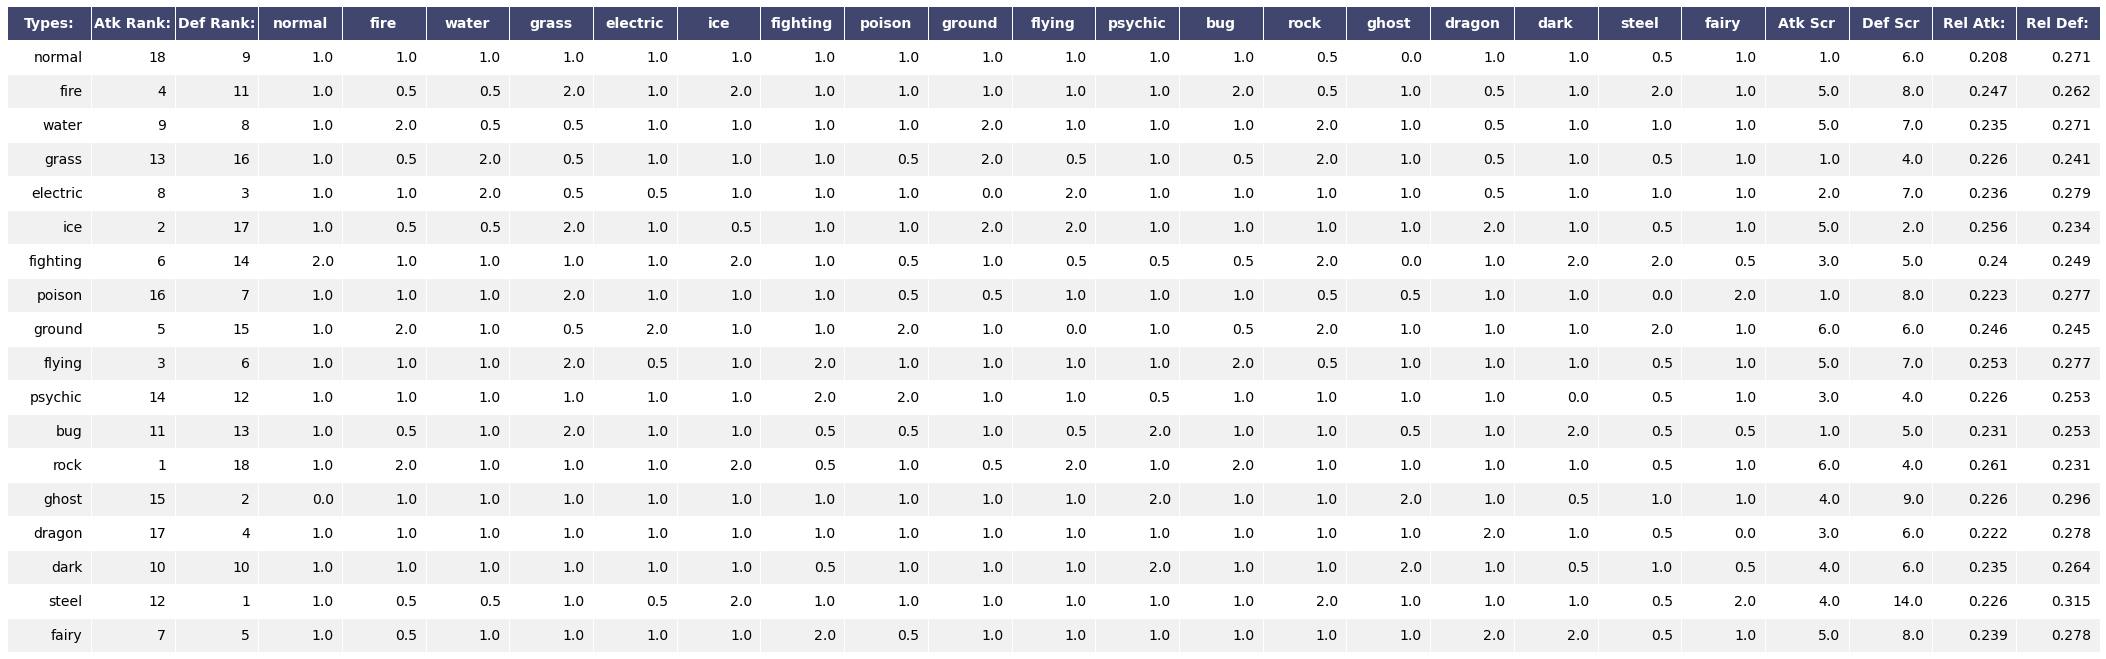

In [ ]:
render_mpl_table(type_df, header_columns=0, col_width=1.5)